# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [6]:
# Criar a tabela bivariada
bivariada = df.groupby('sex')['flag_doente'].agg(['sum', 'count'])
bivariada.columns = ['Doentes', 'Total']
bivariada['Saudáveis'] = bivariada['Total'] - bivariada['Doentes']

# Quantidade média de doentes
bivariada['Média de Doentes'] = bivariada['Doentes'] / bivariada['Total']

# Cálculo das Odds
bivariada['Odds'] = bivariada['Doentes'] / bivariada['Saudáveis']

# Odds total (para referência)
odds_total = bivariada['Doentes'].sum() / bivariada['Saudáveis'].sum()

# Cálculo do Odds Ratio
bivariada['Odds Ratio'] = bivariada['Odds'] / odds_total

# Cálculo do Logito (Log(Odds))
bivariada['Logito'] = np.log(bivariada['Odds'])

# Cálculo do Weight of Evidence (WOE)
bivariada['WOE'] = np.log(bivariada['Odds Ratio'])

# Ajustar índice para melhor visualização
bivariada.index = ['Mulheres (0)', 'Homens (1)']

# Exibir resultado
print(bivariada)

              Doentes  Total  Saudáveis  Média de Doentes      Odds  \
Mulheres (0)       25     97         72          0.257732  0.347222   
Homens (1)        114    206         92          0.553398  1.239130   

              Odds Ratio   Logito       WOE  
Mulheres (0)    0.409672 -1.05779 -0.892398  
Homens (1)      1.461996  0.21441  0.379802  


Pontos importantes:

A Odds dos homens deu > 1, ou seja em média homens tem mais chance de doenças do coração que mulheres.
O WOE para homenes tambem ficou > que 0, significa que há maior chance do evento ocorrer do que na média.

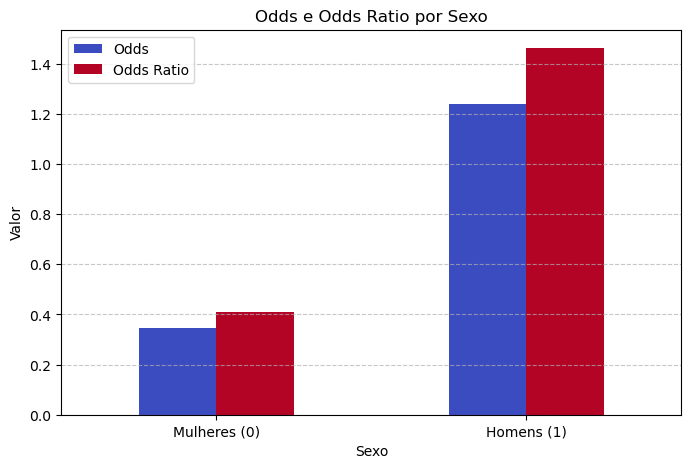

In [15]:
bivariada[['Odds', 'Odds Ratio']].plot(kind='bar', figsize=(8, 5), colormap='coolwarm')
plt.title("Odds e Odds Ratio por Sexo")
plt.xlabel("Sexo")
plt.ylabel("Valor")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [17]:
# Criar faixas etárias
df['faixa_etaria'] = pd.cut(df['age'], bins=5, labels=['<40', '40-50', '50-60', '60-70', '70+'])

# Criar a tabela bivariada
bivariada_age = df.groupby('faixa_etaria').agg(
    Doentes=('flag_doente', 'sum'),
    Total=('flag_doente', 'count'),
    Média_Idade=('age', 'mean')
)

# Calcular saudáveis
bivariada_age['Saudáveis'] = bivariada_age['Total'] - bivariada_age['Doentes']

# Calcular a média de doentes
bivariada_age['Média de Doentes'] = bivariada_age['Doentes'] / bivariada_age['Total']

# Cálculo das Odds
bivariada_age['Odds'] = bivariada_age['Doentes'] / bivariada_age['Saudáveis']

# Odds total (para referência)
odds_total = bivariada_age['Doentes'].sum() / bivariada_age['Saudáveis'].sum()

# Cálculo do Odds Ratio
bivariada_age['Odds Ratio'] = bivariada_age['Odds'] / odds_total

# Cálculo do Logito (Log(Odds))
bivariada_age['Logito'] = np.log(bivariada_age['Odds'])

# Cálculo do Weight of Evidence (WOE)
bivariada_age['WOE'] = np.log(bivariada_age['Odds Ratio'])

# Exibir resultado
print(bivariada_age)

              Doentes  Total  Média_Idade  Saudáveis  Média de Doentes  \
faixa_etaria                                                             
<40                 3     11    35.181818          8          0.272727   
40-50              21     71    43.704225         50          0.295775   
50-60              41     97    53.567010         56          0.422680   
60-70              67    107    61.775701         40          0.626168   
70+                 7     17    70.529412         10          0.411765   

                  Odds  Odds Ratio    Logito       WOE  
faixa_etaria                                            
<40           0.375000    0.442446 -0.980829 -0.815437  
40-50         0.420000    0.495540 -0.867501 -0.702108  
50-60         0.732143    0.863823 -0.311780 -0.146387  
60-70         1.675000    1.976259  0.515813  0.681206  
70+           0.700000    0.825899 -0.356675 -0.191282  


C:\Users\djang\AppData\Local\Temp\ipykernel_17484\3322856856.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bivariada_age = df.groupby('faixa_etaria').agg(


In [ ]:
Pontos importantes:

A faixa de 60-70 indica maior risco comparado ao total por esta com o Odds Ratio > 1 e WOE > 0.

3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

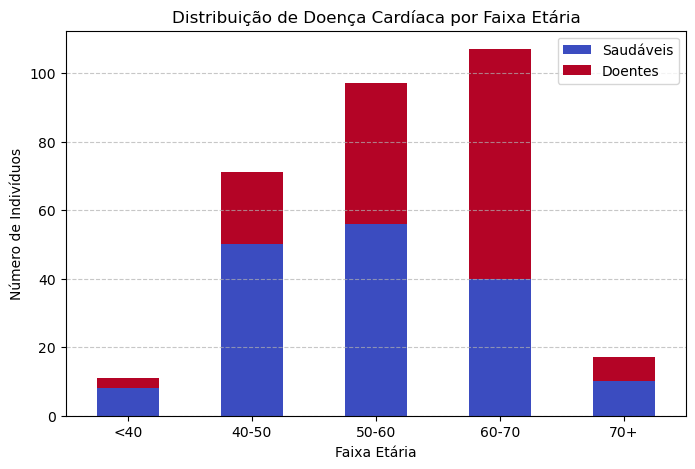

In [19]:
bivariada_age[['Saudáveis', 'Doentes']].plot(kind='bar', stacked=True, figsize=(8, 5), colormap='coolwarm')
plt.title("Distribuição de Doença Cardíaca por Faixa Etária")
plt.xlabel("Faixa Etária")
plt.ylabel("Número de Indivíduos")
plt.legend(["Saudáveis", "Doentes"])
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
